<a href="https://colab.research.google.com/github/team5INFO5731/INFO5731-FinalProject/blob/main/TOPICMODELLING_ON_MEDICAL_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MEDICAL DATASET**

In [ ]:
''' This would be a medical dataset
This dataset can be downloaded from kaggle,
This dataset contains sample medical transcriptions for various medical specialties.
'''
# Load data
import pandas as pd
input_df=pd.read_csv('/content/mtsamples.csv')
print(input_df.head())

   Unnamed: 0  ...                                           keywords
0           0  ...  allergy / immunology, allergic rhinitis, aller...
1           1  ...  bariatrics, laparoscopic gastric bypass, weigh...
2           2  ...  bariatrics, laparoscopic gastric bypass, heart...
3           3  ...  cardiovascular / pulmonary, 2-d m-mode, dopple...
4           4  ...  cardiovascular / pulmonary, 2-d, doppler, echo...

[5 rows x 6 columns]


**EDA - Exploratory data analysis**

In [ ]:
# Find the shape of the dataset
input_df.shape

(4999, 6)

In [ ]:
# Find the basic info of the dataset, to check if there are any null values
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4999 non-null   int64 
 1   description        4999 non-null   object
 2   medical_specialty  4999 non-null   object
 3   sample_name        4999 non-null   object
 4   transcription      4966 non-null   object
 5   keywords           3931 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [ ]:
#null values are present in the dataset as the shape and nonnull values from the info() dot match
print(input_df.isnull().sum())
# Dropping the null values
input_df=input_df.dropna()

Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64


In [ ]:
#steps involving all the basic steps of preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words=stopwords.words("english")
frequent_words= []
rare_words=[]
# cleaning the text data
input_df['cleaned_data'] = input_df['description'].str.replace(r"\W", " ").str.strip()# 1.To remove special characters and punctuations
input_df['cleaned_data'] = input_df['cleaned_data'].str.replace(r'\d+',"") #2.To remove Numbers
input_df['cleaned_data'] = input_df['cleaned_data'].apply(lambda x: " ".join(x.lower() for x in x.split())) #convert the whole text into lower case
input_df['cleaned_data'] = input_df['cleaned_data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words)) #remove all stop words
frequent_words = list(pd.Series(' '.join(input_df['cleaned_data']).split()).value_counts()[:15].index) #top 15 frequent words
rare_words = list(pd.Series(' '.join(input_df['cleaned_data']).split()).value_counts()[-15:].index) #top 15 rare words 
input_df['cleaned_data'] = input_df['cleaned_data'].apply(lambda x: ' '.join([i for i in x.split() if i not in frequent_words]))
input_df['cleaned_data'] = input_df['cleaned_data'].apply(lambda x: ' '.join([i for i in x.split() if i not in rare_words]))
#input_df['cleaned text review'] # dataframe column that would be used for further process

#data cleaning for Labels
input_df['labels'] = input_df['medical_specialty'].str.replace(r"\W", " ").str.strip()# 1.To remove special characters and punctuations
input_df['labels'] = input_df['labels'].apply(lambda x: " ".join(x.lower() for x in x.split())) #convert the whole text into lower case
input_df


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords,cleaned_data,labels
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",white presents complaint allergies,allergy immunology
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",consult laparoscopic gastric bypass,bariatrics
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...",consult laparoscopic gastric bypass,bariatrics
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",mode doppler,cardiovascular pulmonary
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",echocardiogram,cardiovascular pulmonary
...,...,...,...,...,...,...,...,...
4984,4984,Patient suffered from morbid obesity for many...,Bariatrics,Discharge Summary - Gastric Bypass,"ADMISSION DIAGNOSIS:, Morbid obesity. BMI is...","bariatrics, laparoscopic gastric bypass, gastr...",suffered morbid obesity many years made multip...,bariatrics
4985,4985,Patient presented to the Bariatric Surgery Se...,Bariatrics,Bariatric Consult - Surgical Weight Loss - 4,"HISTORY OF PRESENT ILLNESS:, Ms. A is a 55-ye...","bariatrics, jenny craig, medifast, nutrisystem...",presented bariatric surgery service considerat...,bariatrics
4989,4989,Evaluation for elective surgical weight loss ...,Bariatrics,Bariatric Consult - Surgical Weight Loss - 2,"PAST MEDICAL HISTORY: ,She had a negative str...","bariatrics, elective surgical weight loss, sur...",evaluation elective surgical weight loss via l...,bariatrics
4993,4993,"Chronic glossitis, xerostomia, probable envir...",Allergy / Immunology,Evaluation of Allergies,"HISTORY:, A 55-year-old female presents self-...","allergy / immunology, chronic glossitis, xeros...",chronic glossitis xerostomia probable environm...,allergy immunology


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(input_df['cleaned_data']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [ ]:
import sys
sys.path.insert(1,'/content/')

**LDA TEXT MODELLING**

In [ ]:
import AlgorithmLDA as lda_ul
result = lda_ul.LDA_MODEL(10,tf,tf_feature_names,10)
result

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,fracture,113.5,repair,121.1,laparoscopic,152.0,post,117.8,shoulder,103.1,eye,113.1,upper,145.5,contrast,149.1,chest,95.5,foot,106.0
1,open,105.5,knee,100.5,normal,87.9,back,110.6,breast,99.1,coronary,109.0,renal,99.9,without,138.6,abdominal,68.7,body,74.9
2,release,91.1,hernia,85.8,exam,79.5,status,106.6,neck,86.6,artery,100.9,brain,87.1,abdomen,98.2,total,62.7,injection,67.8
3,carpal,80.1,inguinal,83.1,tumor,77.1,low,94.1,mass,68.3,insertion,77.6,lower,81.4,spine,97.9,stress,59.1,foreign,64.1
4,tunnel,80.1,incision,66.3,bladder,75.5,lumbar,93.2,nerve,64.0,heart,76.9,lobe,77.1,mri,79.6,severe,52.6,colonoscopy,58.1
5,fusion,79.0,hip,65.1,acute,68.3,evaluation,57.6,prostate,54.0,placement,67.3,bronchoscopy,65.1,pelvis,74.1,pulmonary,51.0,drainage,54.9
6,discectomy,77.1,skin,54.0,physical,64.1,therapy,55.8,tear,53.1,cataract,65.1,biopsy,56.4,negative,60.1,mild,50.1,colon,54.1
7,reduction,75.1,sample,52.4,adhesions,55.6,pregnancy,47.6,excision,52.7,catheter,61.1,mass,52.3,obtained,45.5,scan,49.4,abscess,53.1
8,bone,71.1,using,50.8,cholecystectomy,51.1,consultation,45.8,laceration,52.1,ultrasound,60.6,lung,52.1,head,41.3,x,48.6,removal,48.1
9,fixation,66.4,made,50.5,noted,48.0,diabetes,45.1,lesion,49.9,lens,56.1,mri,37.6,evaluate,35.5,study,45.0,loss,48.0


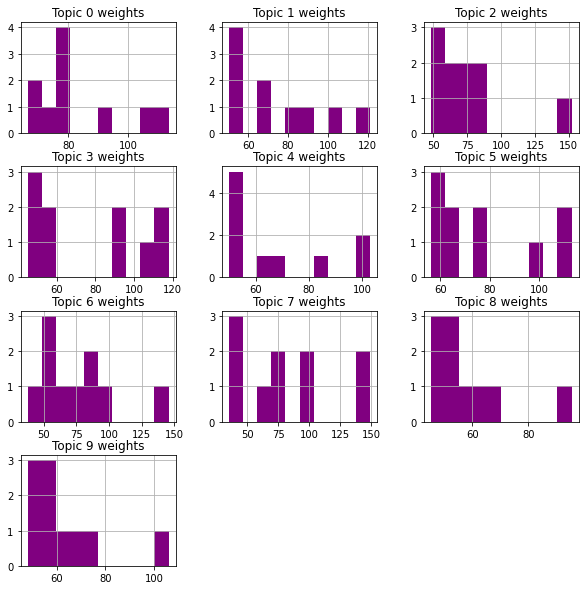

In [ ]:
import matplotlib.pyplot as plt
columns_list = ["Topic "+str(i)+" weights" for i in range(0,10)]
for i in columns_list:
  result[i] = pd.to_numeric(result[i])
result.hist(figsize=(10,10),color = 'Purple')
plt.show(block=False)

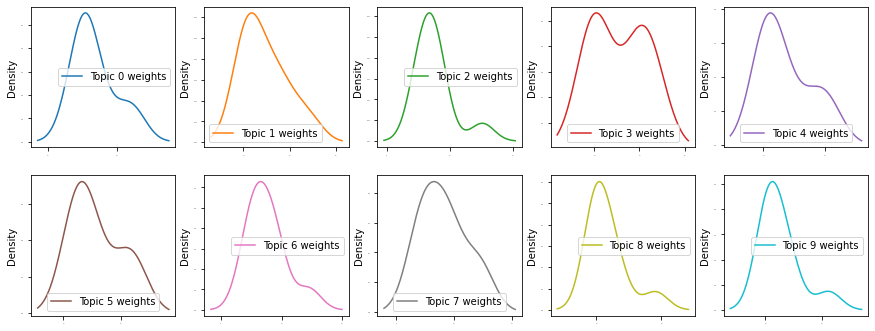

In [ ]:
result.plot(kind='density', subplots=True,layout = (5,5),sharex=False, legend=True, fontsize=1,figsize=(15,15))
plt.show(block=False)

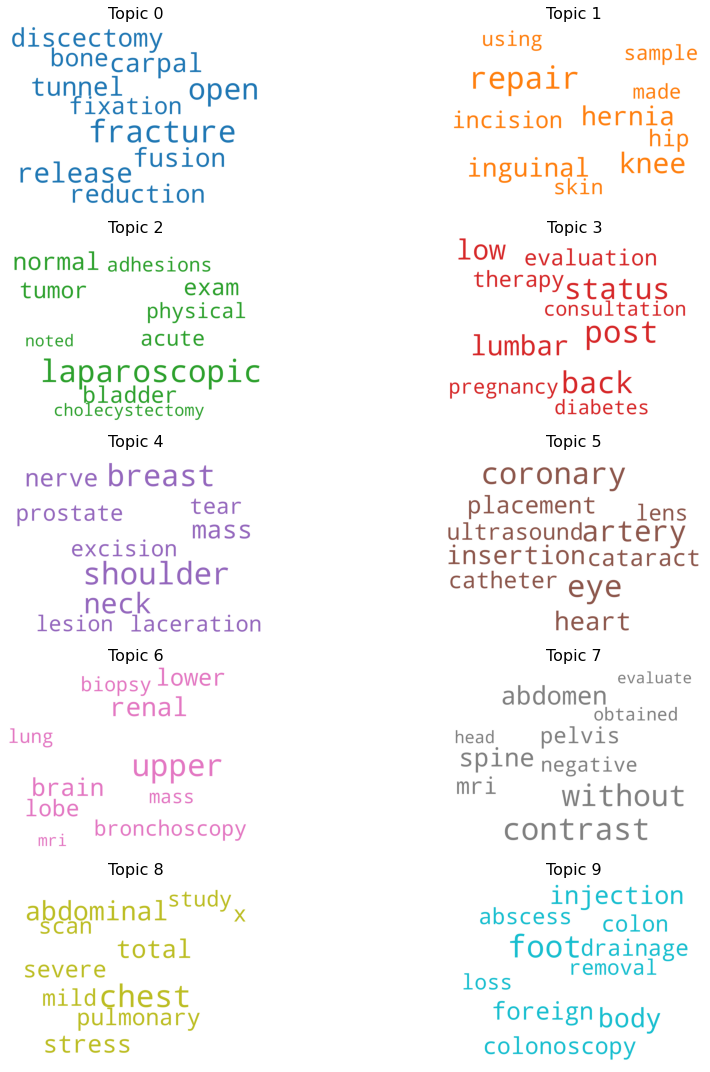

In [ ]:
# Wordcloud of Top N words in each topic
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
my_stopwords = nltk.corpus.stopwords.words('english')

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=my_stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

columns_list = ["Topic "+str(i)+" words" for i in range(0,10)]
topics = list()

for i in columns_list:
  topics.append(result[i].values)

frequencies = list()
columns_list = ["Topic "+str(i)+" weights" for i in range(0,10)]

for i in columns_list:
  frequencies.append(result[i].values)


fig, axes = plt.subplots(5,2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    size_of_array = len(topics[i])
    topic_words = dict()
    for j in range(size_of_array):
      topic_words[topics[i][j]] = frequencies[i][j]
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

**LSA TOPIC MODELLING**

In [ ]:
import AlgorithmLSA as lsa
lsa_result=lsa.LSA_MODEL(tf,vectorizer)
lsa_result

,Topic 0,Topic 0 weights,Topic 1,Topic 1 weights,Topic 2,Topic 2 weights,Topic 3,Topic 3 weights,Topic 4,Topic 4 weights,Topic 5,Topic 5 weights,Topic 6,Topic 6 weights,Topic 7,Topic 7 weights,Topic 8,Topic 8 weights,Topic 9,Topic 9 weights,Topic 10,Topic 10 weights,Topic 11,Topic 11 weights,Topic 12,Topic 12 weights,Topic 13,Topic 13 weights,Topic 14,Topic 14 weights,Topic 15,Topic 15 weights,Topic 16,Topic 16 weights,Topic 17,Topic 17 weights,Topic 18,Topic 18 weights,Topic 19,Topic 19 weights
0,artery,0.223853,contrast,0.571276,artery,0.505506,fixation,0.317479,shoulder,0.421518,eye,0.581421,carpal,0.486662,knee,0.485783,inguinal,0.378777,negative,0.310201,negative,0.344606,negative,0.314302,bone,0.279778,upper,0.439911,post,0.244527,fracture,0.234617,chest,0.563259,lumbar,0.277493,low,0.308329,dissection,0.281412
1,coronary,0.187012,without,0.450177,coronary,0.450750,foot,0.297213,repair,0.263776,cataract,0.390140,tunnel,0.479301,post,0.304684,hernia,0.331615,normal,0.301081,knee,0.341874,normal,0.283954,fusion,0.262967,lobe,0.311158,inguinal,0.239910,removal,0.225471,mass,0.125341,back,0.265895,neck,0.266892,incision,0.219565
2,internal,0.171569,abdomen,0.317828,angiography,0.165644,internal,0.266968,cuff,0.224901,lens,0.311530,release,0.347788,status,0.279675,repair,0.329351,fracture,0.189766,foot,0.332007,mass,0.248381,discectomy,0.221704,lower,0.222055,status,0.216128,body,0.207152,placement,0.121529,chronic,0.224645,back,0.231586,neck,0.206038
3,mass,0.167510,pelvis,0.265609,heart,0.157507,fracture,0.221773,rotator,0.213489,phacoemulsification,0.234106,syndrome,0.231892,total,0.197046,knee,0.271342,open,0.170732,normal,0.321098,breast,0.212397,nerve,0.216662,chest,0.153292,hernia,0.202539,incision,0.206573,pulmonary,0.121273,low,0.181511,dissection,0.202520,chronic,0.196175
4,contrast,0.156723,obtained,0.158891,bypass,0.152713,open,0.185690,tear,0.195851,intraocular,0.225900,nerve,0.159090,medial,0.165152,total,0.132082,template,0.170484,template,0.170340,fracture,0.192325,decompression,0.194108,medial,0.130696,upper,0.198053,foreign,0.199628,chronic,0.113671,lateral,0.148630,chest,0.195636,inguinal,0.175028
5,post,0.155162,images,0.141836,catheterization,0.145806,contrast,0.162378,eye,0.195428,posterior,0.188030,incision,0.141116,fracture,0.132975,medial,0.131209,acute,0.143430,body,0.156447,biopsy,0.169696,instrumentation,0.187457,resection,0.120994,repair,0.169941,open,0.186906,stress,0.111672,spine,0.140062,bladder,0.186545,made,0.153079
6,repair,0.154739,axial,0.137867,graft,0.139475,screw,0.159860,arthroscopy,0.132866,extraction,0.155608,dissection,0.131386,arthroplasty,0.119073,using,0.106132,chronic,0.126499,foreign,0.147233,template,0.161258,negative,0.175803,lung,0.113333,breast,0.152224,skin,0.167332,repair,0.108020,skin,0.127780,transverse,0.161339,carried,0.143090


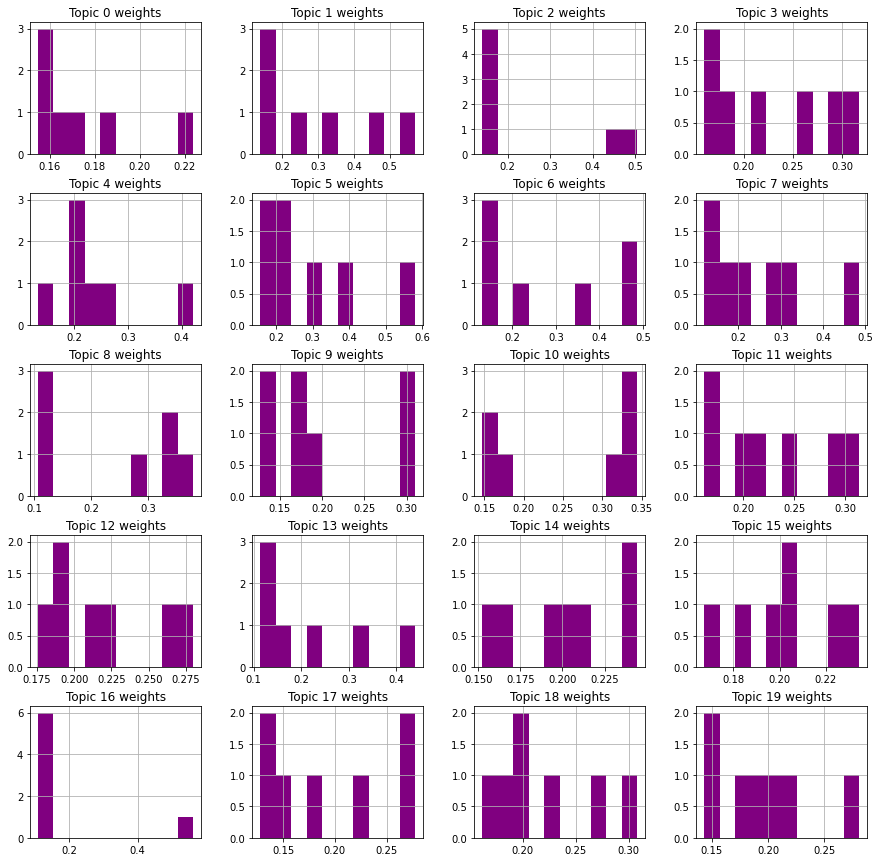

In [ ]:
columns_list = ["Topic "+str(i)+" weights" for i in range(0,10)]
for i in columns_list:
  lsa_result[i] = pd.to_numeric(lsa_result[i])
lsa_result.hist(figsize=(15,15),color = 'purple')
plt.show(block=False)

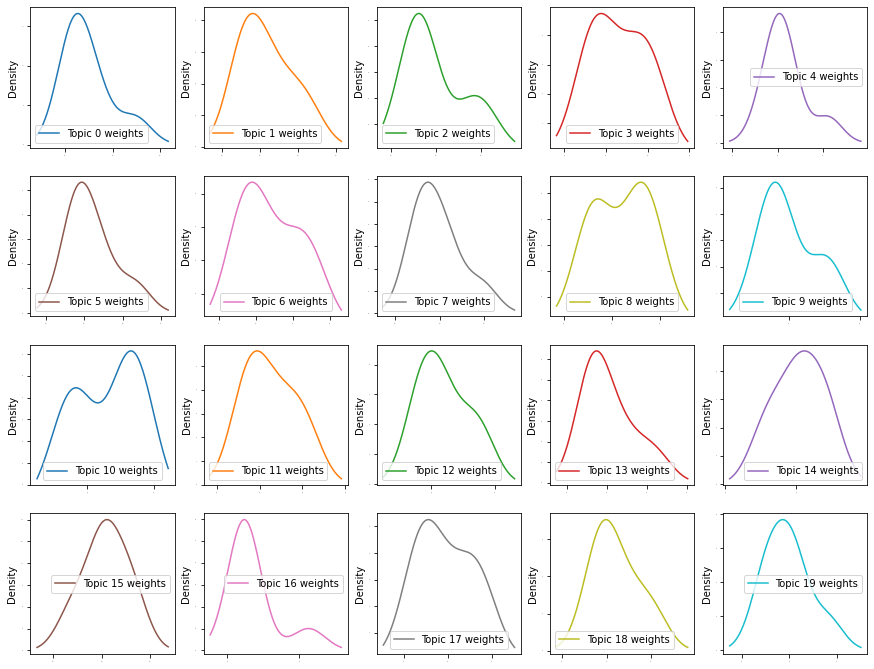

In [ ]:
lsa_result.plot(kind='density', subplots=True,layout = (5,5),sharex=False, legend=True, fontsize=1,figsize=(15,15))
plt.show(block=False)

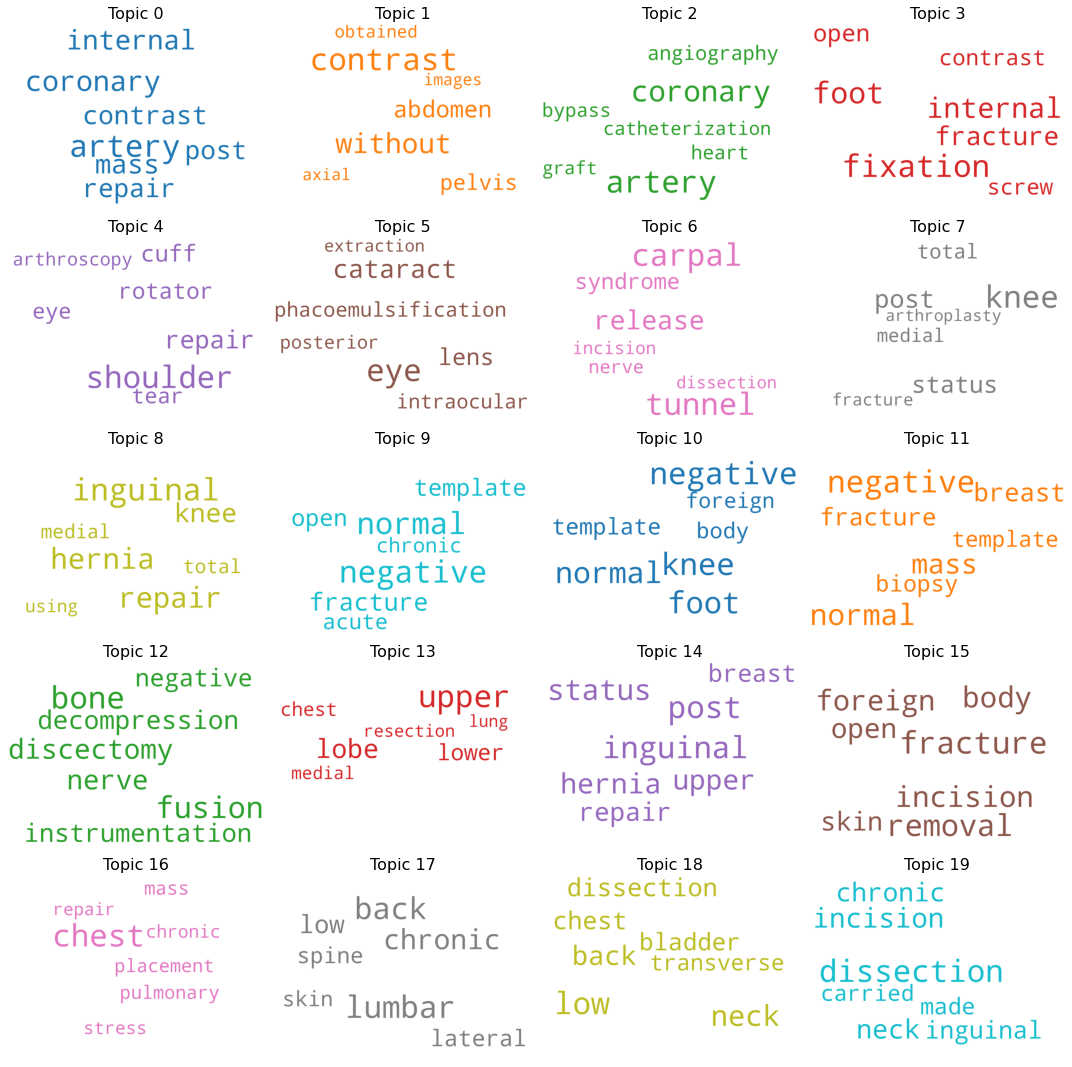

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cols = cols*2
cloud = WordCloud(stopwords=my_stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

columns_list = ["Topic "+str(i) for i in range(0,20)]
topics = list()

for i in columns_list:
  topics.append(lsa_result[i].values)

frequencies = list()
columns_list = ["Topic "+str(i)+" weights" for i in range(0,20)]

for i in columns_list:
  frequencies.append(lsa_result[i].values)


fig, axes = plt.subplots(5,4, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    size_of_array = len(topics[i])
    topic_words = dict()
    for j in range(size_of_array):
      topic_words[topics[i][j]] = frequencies[i][j]
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

**LLDA TOPIC MODELLING**

In [ ]:
import AlgorithmLLDA as llda

import numpy as np
required_df = input_df[["cleaned_data","labels"]].head(2000)

In [ ]:
required_columns = np.unique(required_df.labels.values)

In [ ]:
required_df.shape

(2000, 2)

In [ ]:
required_list = list()
for i in required_df.values:
  res = tuple()
  res = res + (i[0],)
  res = res + ([i[1]],)
  required_list.append(res)

In [ ]:
llda_model = llda.LldaModel(labeled_documents=required_list, alpha_vector=0.01)

In [ ]:
arrayof_labels = input_df["cleaned_data"].values[2000:]

In [ ]:
len(arrayof_labels)

1898

In [ ]:
df = pd.DataFrame()
df["Reviews"]= arrayof_labels
allergy_immunology = list()
bariatrics = list()
cardiovascular_pulmonary = list()
chiropractic = list()
consult_history_phy = list()
cosmetic_plastic_surgery = list()
dentistry = list()
dermatology = list()
diets_and_nutritions = list()
discharge_summary = list()
emergency_room_reports = list()
endocrinology = list()
ent_otolaryngology = list()
gastroenterology = list()
hematology_oncology = list()
general_medicine = list()
hospice_palliative_care= list()
ime_qme_work_comp_etc= list()
lab_medicine_pathology = list()
letters = list()
nephrology = list()
neurology = list()
neurosurgery = list()
obstetrics_gynecology = list()
office_notes = list()
ophthalmology = list()
orthopedic = list()
pain_management = list()
pediatrics_neonatal = list()
physical_medicine_rehab = list()
podiatry= list()
radiology = list()
rheumatology = list()
sleep_medicine = list()
soap_chart_progress_notes = list()
psychiatry_psychology = list()
speech_language = list()
surgery = list()
urology = list()
for i in arrayof_labels:
  topics = llda_model.inference(document=i, iteration=100, times=10)
  for j in topics:
    if(j[0]=="allergy immunology"):
      allergy_immunology.append(j[1])
    elif(j[0]=="bariatrics"):
      bariatrics.append(j[1])
    elif(j[0]=="cardiovascular pulmonary"):
      cardiovascular_pulmonary.append(j[1])
    elif(j[0]=="chiropractic"):
      chiropractic.append(j[1])
    elif(j[0]=="consult history and phy"):
      consult_history_phy.append(j[1])
    elif(j[0]=="cosmetic plastic surgery"):
      cosmetic_plastic_surgery.append(j[1])
    elif(j[0]=="dentistry"):
      dentistry.append(j[1])
    elif(j[0]=="dermatology"):
      dermatology.append(j[1])
    elif(j[0]=="diets and nutritions"):
      diets_and_nutritions.append(j[1])
    elif(j[0]=="discharge summary "):
      discharge_summary.append(j[1])
    elif(j[0]=="emergency room reports"):
      emergency_room_reports.append(j[1])
    elif(j[0]=="endocrinology"):
      endocrinology.append(j[1])
    elif(j[0]=="ent otolaryngology "):
      ent_otolaryngology.append(j[1])
    elif(j[0]=="hematology_oncology"):
      hematology_oncology.append(j[1])
    elif(j[0]=="general medicine "):
      general_medicine.append(j[1])
    elif(j[0]=="hospice palliative care "):
      hospice_palliative_care.append(j[1])
    elif(j[0]=="ime qme work comp etc "):
      ime_qme_work_comp_etc.append(j[1])
    elif(j[0]=="lab medicine pathology "):
      lab_medicine_pathology.append(j[1])
    elif(j[0]=="letters"):
      letters.append(j[1])
    elif(j[0]=="nephrology "):
      nephrology.append(j[1])
    elif(j[0]=="neurology"):
      neurology.append(j[1])
    elif(j[0]=="neurosurgery "):
      neurosurgery.append(j[1])
    elif(j[0]=="obstetrics gynecology"):
      obstetrics_gynecology.append(j[1])
    elif(j[0]=="office notes "):
      office_notes.append(j[1])
    elif(j[0]=="ophthalmology "):
      ophthalmology.append(j[1])
    elif(j[0]=="orthopedic "):
      orthopedic.append(j[1])
    elif(j[0]=="pain management"):
      pain_management.append(j[1])
    elif(j[0]=="pediatrics neonatal"):
      pediatrics_neonatal.append(j[1])
    elif(j[0]=="physical medicine rehab"):
      physical_medicine_rehab.append(j[1])
    elif(j[0]=="podiatry"):
      podiatry.append(j[1])
    elif(j[0]=="psychiatry psychology"):
      psychiatry_psychology.append(j[1])
    elif(j[0]=="radiology"):
      radiology.append(j[1])
    elif(j[0]=="rheumatology"):
      rheumatology.append(j[1])
    elif(j[0]=="sleep medicine "):
      sleep_medicine.append(j[1])
    elif(j[0]=="soap chart progress notes"):
      soap_chart_progress_notes.append(j[1])
    elif(j[0]=="psychiatry psychology"):
      psychiatry_psychology.append(j[1])
    elif(j[0]=="surgery"):
      surgery.append(j[1])
    else:
      urology.append(j[1])

In [ ]:
def create_a_dataframe(df,column_name,listname):
  df[column_name] = listname
  return df

  



In [ ]:
  for j in required_columns:
    res = list()
    if(j[0]=="allergy immunology"):
       res= allergy_immunology
    elif(j[0]=="bariatrics"):  
        res=bariatrics
    elif(j[0]=="cardiovascular pulmonary"):  
      res= cardiovascular_pulmonary 
    elif(j[0]=="chiropractic"):  
      res= chiropractic 
    elif(j[0]=="consult history and phy"):  
      res= consult_history_phy 
    elif(j[0]=="cosmetic plastic surgery"):  
      res= cosmetic_plastic_surgery 
    elif(j[0]=="dentistry"):  
      res= dentistry 
    elif(j[0]=="dermatology"):  
      res= dermatology 
    elif(j[0]=="diets and nutritions"):  
      res= diets_and_nutritions 
    elif(j[0]=="discharge summary "):  
      res= discharge_summary 
    elif(j[0]=="emergency room reports"):  
      res= emergency_room_reports 
    elif(j[0]=="endocrinology"):  
      res= endocrinology 
    elif(j[0]=="ent otolaryngology "):  
      res= ent_otolaryngology 
    elif(j[0]=="hematology_oncology"):  
      res= hematology_oncology 
    elif(j[0]=="general medicine "):  
      res= general_medicine 
    elif(j[0]=="hospice palliative care "):  
      res= hospice_palliative_care 
    elif(j[0]=="ime qme work comp etc "):  
      res= ime_qme_work_comp_etc 
    elif(j[0]=="lab medicine pathology "):  
      res= lab_medicine_pathology 
    elif(j[0]=="letters"):  
      res= letters 
    elif(j[0]=="nephrology "):  
      res= nephrology 
    elif(j[0]=="neurology"):  
      res= neurology 
    elif(j[0]=="neurosurgery "):  
      res= neurosurgery 
    elif(j[0]=="obstetrics gynecology"):  
      res= obstetrics_gynecology 
    elif(j[0]=="office notes "):  
      res= office_notes 
    elif(j[0]=="ophthalmology "):  
      res= ophthalmology 
    elif(j[0]=="orthopedic "):  
      res= orthopedic 
    elif(j[0]=="pain management"):  
      res= pain_management 
    elif(j[0]=="pediatrics neonatal"):  
      res= pediatrics_neonatal 
    elif(j[0]=="physical medicine rehab"):  
      res= physical_medicine_rehab 
    elif(j[0]=="podiatry"):  
      res= podiatry 
    elif(j[0]=="psychiatry psychology"):  
      res= psychiatry_psychology 
    elif(j[0]=="radiology"):  
      res= radiology 
    elif(j[0]=="rheumatology"):  
      res= rheumatology 
    elif(j[0]=="sleep medicine "):  
      res= sleep_medicine 
    elif(j[0]=="soap chart progress notes"):  
      res= soap_chart_progress_notes 
    elif(j[0]=="psychiatry psychology"):  
      res= psychiatry_psychology 
    elif(j[0]=="surgery"):  
      res= surgery 
    else:  
      res= urology 
    df = create_a_dataframe(df, j, res[:1898])

In [ ]:
df.head(5)

,Reviews,allergy immunology,bariatrics,cardiovascular pulmonary,dentistry,general medicine,orthopedic,pain management,pediatrics neonatal,physical medicine rehab,podiatry,psychiatry psychology,radiology,rheumatology,sleep medicine,soap chart progress notes,speech language,surgery,urology
0,closing wedge osteotomy fifth metatarsal inter...,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970
1,spondylosis kyphotic deformity nerve conductio...,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970
2,distal bone forearm fracture closed reduction ...,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088
3,carpal tunnel syndrome endoscopic carpal tunne...,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088
4,knee arthroscopy removal cartilage loose body ...,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088,0.001088


**Supervised LDA TOPIC MODELLING**

In [ ]:
!pip install pymc

In [ ]:
training_data = input_df['cleaned_data'].values

In [ ]:
import nltk
from nltk import word_tokenize
from nltk.corpus import reuters, stopwords
from six.moves import xrange
from collections import Counter

def get_ids_cnt(corpus, max_voca=9999999, remove_top_n=5):
    voca = set(w.lower() for w in nltk.corpus.words.words())
    stop = stopwords.words('english')

    docs = list()
    freq = Counter()

    for doc in corpus:
        if isinstance(doc, str):
            doc = word_tokenize(doc)
        elif not hasattr(doc, '__iter__'):
            raise Exception('Corpus is not a list of string or token list')

        # remove word using stopword list or single character word
        doc = [word.lower() for word in doc if word.lower() in voca and word.lower() not in stop and len(word) != 1]
        freq.update(doc)
        docs.append(doc)

    voca = [key for iter, (key, val) in enumerate(freq.most_common(max_voca)) if iter >= remove_top_n]

    voca_dic = dict()
    voca_list = list()
    for word in voca:
        voca_dic[word] = len(voca_dic)
        voca_list.append(word)

    doc_ids = list()
    doc_cnt = list()

    for doc in docs:
        words = set(doc)
        ids = np.array([int(voca_dic[word]) for word in words if word in voca_dic])
        cnt = np.array([int(doc.count(word)) for word in words if word in voca_dic])

        doc_ids.append(ids)
        doc_cnt.append(cnt)

    return np.array(voca_list), doc_ids, doc_cnt

In [ ]:
voca, word_ids, word_cnt = get_ids_cnt(training_data)

In [ ]:
def convert_cnt_to_list(word_ids, word_cnt):
    corpus = list()

    for di in xrange(len(word_ids)):
        doc = list()
        doc_ids = word_ids[di]
        doc_cnt = word_cnt[di]
        for wi in xrange(len(doc_ids)):
            word_id = doc_ids[wi]
            for si in xrange(doc_cnt[wi]):
                doc.append(word_id)
        corpus.append(doc)
    return corpus

In [ ]:
corpus = convert_cnt_to_list(word_ids, word_cnt)

In [ ]:
import AlgorithmsupervisedLDA as slda

In [ ]:
n_doc = len(corpus)
n_voca = voca.size

In [ ]:
n_doc

3898

In [ ]:
import random
#fit artificial sevearity
sevearity = [random.randint(0,5) for i in range(0,3898)]

In [ ]:
model = slda.SupervisedLDA(n_doc, n_voca, 10, sigma=0.01)
model.fit(corpus, sevearity)

In [ ]:
for ti in model.eta.argsort():
    top_words = get_top_words(model.TW, voca, ti, n_words=10)
    print('Eta', model.eta[ti] ,'\nTopic', ti ,':\t', ','.join(top_words))

Eta -5.693614572168421 
Topic 3 :	 lower,insertion,back,dissection,chronic,posterior,used,severe,large,removal
Eta -1.406891575489472 
Topic 5 :	 severe,laceration,secondary,stenosis,examination,eye,decompression,therapy,fusion,teeth
Eta -1.242086123628395 
Topic 8 :	 mass,breast,biopsy,skin,excision,knee,total,without,lumbar,male
Eta 0.5122569747426198 
Topic 1 :	 failure,neck,status,respiratory,carcinoma,cell,stage,lung,renal,bronchoscopy
Eta 1.1180126752539987 
Topic 9 :	 artery,coronary,heart,angiography,catheterization,stress,femoral,negative,knee,bypass
Eta 1.1217957395087756 
Topic 7 :	 contrast,without,abdomen,acute,pelvis,colonoscopy,bladder,brain,abdominal,possible
Eta 1.1674148575743222 
Topic 6 :	 nerve,foot,fixation,open,fracture,tunnel,hernia,distal,inguinal,carpal
Eta 3.5507830674737724 
Topic 4 :	 eye,shoulder,spinal,cataract,posterior,knee,rotator,degenerative,lumbar,implantation
Eta 5.353700547652992 
Topic 0 :	 incision,fracture,foot,release,removal,fixation,bone,ope

**Bi-Term TOPIC MODELLING**

In [ ]:
!pip install biterm

In [ ]:
import sys
sys.path.insert(1,'/content/')
import AlgorithmBITERM as btm_model
topics = btm_model.BITERM_MODEL(tf,vectorizer)

100%|██████████| 100/100 [04:45<00:00,  2.86s/it]
/content/AlgorithmBITERM.py:8: RuntimeWarning: invalid value encountered in true_divide
  topics = btm.fit_transform(biterms, iterations=100)


In [ ]:
topics

array([[3.56477459e-09, 1.23070203e-04, 9.14680394e-01, ...,
        1.37340415e-08, 1.07749474e-08, 5.41913384e-08],
       [7.96987466e-03, 7.15067913e-09, 6.05713603e-09, ...,
        1.21301141e-08, 9.51659721e-09, 4.78626134e-08],
       [7.96987466e-03, 7.15067913e-09, 6.05713603e-09, ...,
        1.21301141e-08, 9.51659721e-09, 4.78626134e-08],
       ...,
       [8.76169323e-03, 2.02366618e-05, 7.83115113e-02, ...,
        2.59102999e-04, 1.87072730e-05, 7.06836814e-08],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [8.81888425e-02, 1.39852488e-08, 7.01564053e-01, ...,
        2.18013417e-05, 1.86124950e-08, 2.15028240e-02]])

In [ ]:
for i in range(len(texts)):
        print("{} (topic: {})".format(texts[i], topics[i].argmax()))

white presents complaint allergies (topic: 2)
consult laparoscopic gastric bypass (topic: 5)
consult laparoscopic gastric bypass (topic: 5)
mode doppler (topic: 0)
echocardiogram (topic: 0)
morbid obesity laparoscopic antecolic antegastric roux en gastric bypass eea anastomosis overweight many years tried many different diets unsuccessful (topic: 14)
liposuction supraumbilical abdomen revision breast reconstruction excision soft tissue fullness lateral abdomen flank (topic: 18)
echocardiogram (topic: 0)
suction assisted lipectomy lipodystrophy abdomen thighs (topic: 5)
echocardiogram doppler (topic: 0)
morbid obesity laparoscopic roux en gastric bypass antecolic antegastric mm eea anastamosis esophagogastroduodenoscopy (topic: 14)
normal ventricle moderate biatrial enlargement mild tricuspid regurgitation mild increase heart pressures (topic: 10)
presented bariatric surgery service consideration laparoscopic roux en gastric bypass surgery (topic: 14)
surgical removal completely bony im